In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()


import io
df = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))

Saving framingham.csv to framingham (2).csv


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.shape

(4240, 16)

In [ ]:
df=df.rename(columns={"male":"Gender","TenYearCHD":"Target","totChol":"Tchol"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   Tchol            4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  Target           4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60628aae10>,
      dtype=object)

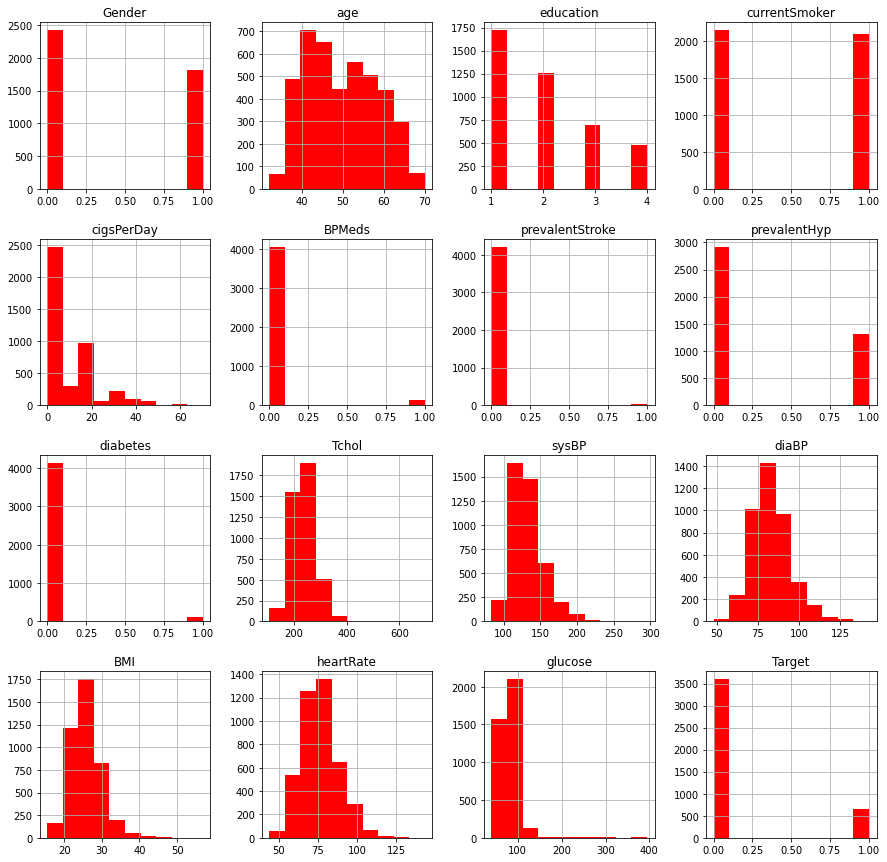

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
df.hist(ax=ax, color= 'red')

In [ ]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
Tchol               50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Target               0
dtype: int64

In [ ]:
WithDisease = len(df[df.Target == 1])
WithoutDisease = len(df[df.Target == 0])
print("Percentage of patients who don't have heart disease: {:.2f}%".format((WithoutDisease / (len(df.Target))*100)))
print("Percentage of patients who have heart disease: {:.2f}%".format((WithDisease / (len(df.Target))*100)))

Percentage of patients who don't have heart disease: 84.81%
Percentage of patients who have heart disease: 15.19%


[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'target')]

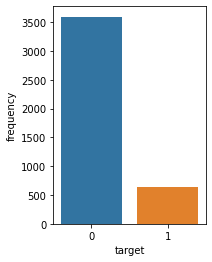

In [ ]:
fig,ax=plt.subplots()
plt.subplot(1,2,1)
ax=sns.countplot(x="Target", data=df)
ax.set(xlabel='target', ylabel='frequency')

In [ ]:
fig,ax=plt.subplots()
plt.subplot(1,2,1)
ax3=sns.countplot(x="Gender", data=df)
ax3.set(xlabel='Gender', ylabel='frequency')

Text(0.5, 0, 'Gender')

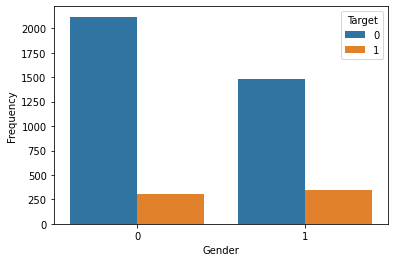

In [ ]:
# males have more chance to get hear attack
fig,ax=plt.subplots()
ax2=sns.countplot(x='Gender',hue='Target',data=df)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Gender')

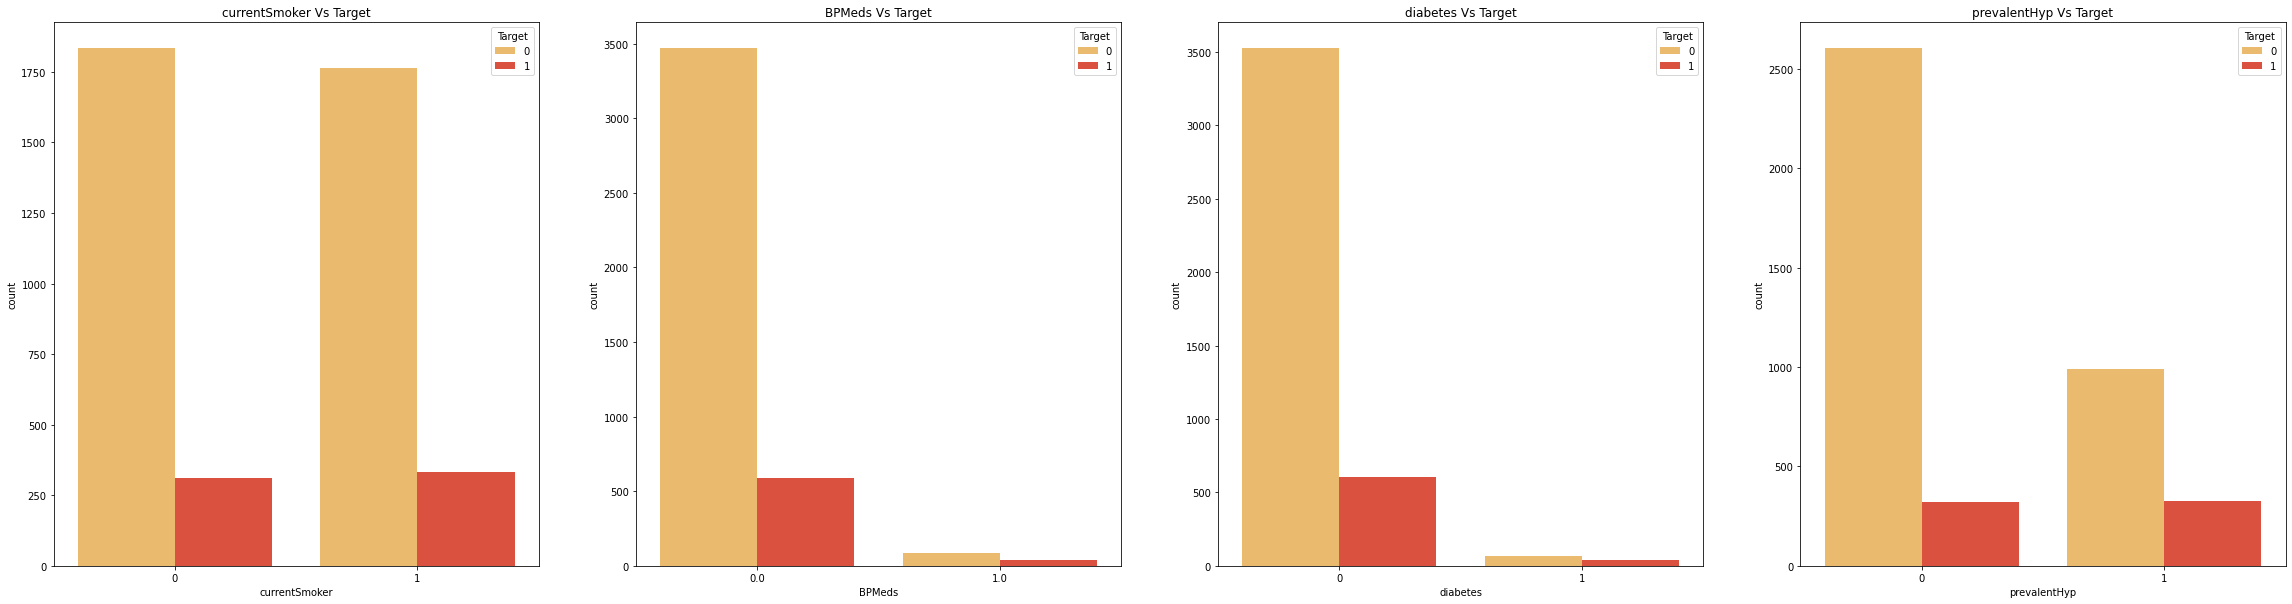

In [ ]:
fig,ax=plt.subplots(figsize=(40,10))


plt.subplot(141)
x1=sns.countplot(x='currentSmoker',data=df,hue='Target',palette='YlOrRd',linewidth=3)
x1.set_title('currentSmoker Vs Target')

plt.subplot(142)
x2=sns.countplot(x='BPMeds',data=df,hue='Target',palette='YlOrRd',linewidth=3)
x2.set_title('BPMeds Vs Target')

plt.subplot(143)
x3=sns.countplot(x='diabetes',data=df,hue='Target',palette='YlOrRd',linewidth=3)
x3.set_title('diabetes Vs Target')

plt.subplot(144)
x4=sns.countplot(x='prevalentHyp',data=df,hue='Target',palette='YlOrRd',linewidth=3)
x4.set_title('prevalentHyp Vs Target')
plt.show()

In [ ]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 556
Middle Ages : 2367
Elderly Ages : 1172


([<matplotlib.patches.Wedge at 0x7f605e76cd30>,
 [Text(1.0014380231339148, 0.4551064554822716, 'Young age'),
  Text(-0.9794358935703341, 0.5007048335956839, 'Middle age'),
  Text(0.6845186145490213, -0.8610657735248154, 'Elderly age')])

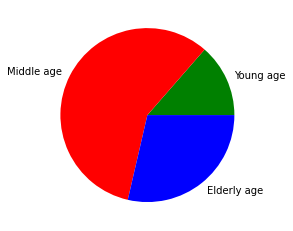

In [ ]:
plt.pie(x=[len(young_ages),len(middle_ages),len(elderly_ages)], labels=['Young age', 'Middle age', 'Elderly age'], colors='GrBuRe')

In [ ]:
df.corr()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Tchol,sysBP,diaBP,BMI,heartRate,glucose,Target
Gender,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
Tchol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


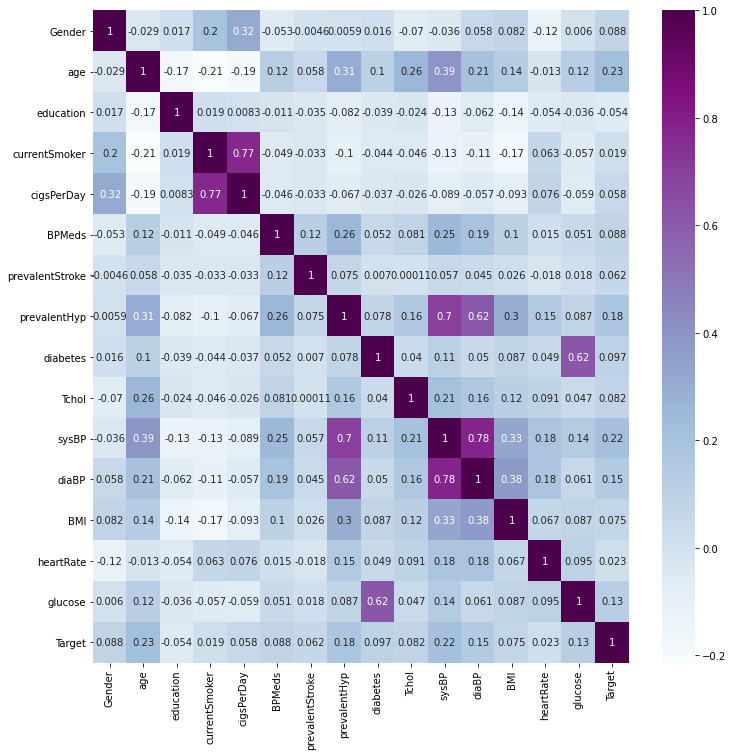

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

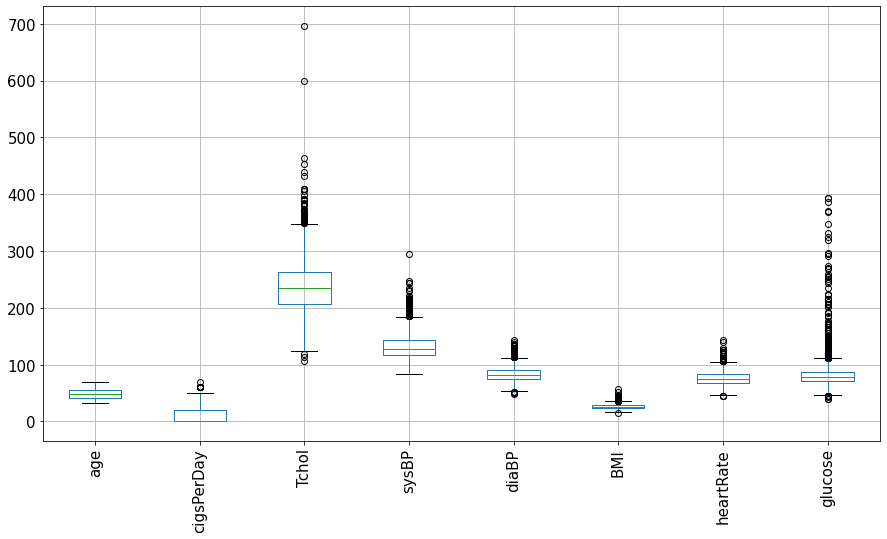

In [ ]:
boxplot = df.boxplot(column=['age','cigsPerDay','Tchol','sysBP','diaBP','BMI','heartRate','glucose'],figsize=(15,8),fontsize=15.0)
plt.xticks(rotation=90)

In [ ]:
#Missing values in column cigsPerDay are from smokers, hence imputing it with median of current smoker

df.cigsPerDay.fillna(df.cigsPerDay.where(df.currentSmoker==1).median(),inplace=True)

In [ ]:
# Our soultion for the problem is irrelevant to Eduacation, So replace with "Zero"

df.education.fillna(0,inplace=True)

In [ ]:
# In column glucose, majority of missing values are not diabetic hence the missing values imouted will Be the median of non diabetic:

df['glucose'].fillna(df['glucose'].where(df['diabetes']==0).median(),inplace=True)

In [ ]:
#In column heartRate, there is only 1 missing value in the column and its for active smoker, hence filling it with median heartrate for Smoker:

df['heartRate'].fillna(df['heartRate'].where(df['currentSmoker']==1).median(),inplace=True)

In [ ]:
# Missing values in column BMI are being imputed with median:

df['BMI'].fillna(df.BMI.median(),inplace=True)


In [ ]:
# Lets impute Missing values in column totChol with median:

df['Tchol'].fillna(df.Tchol.median(),inplace=True)

In [ ]:
#Missing values in column BPMeds may be because they are not on medication, hence filling missing values with '0'

df.BPMeds.fillna(0,inplace=True)

In [ ]:
 #Checking outliers and removing them.


features=['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'Tchol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in features:
    sorted(df[feature])
    q1= np.percentile(df[feature],q=25)
    q3= np.percentile(df[feature],q=75)
#     print(q1)
#     print(q3)
    iqr = q3 - q1
#     print(iqr)
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
#     print(lower_bound,upper_bound)
    df_filtered_1 = df[df[feature] > upper_bound]
    df_filtered_2 = df[df[feature] < lower_bound]
    df.drop(df_filtered_1.index, inplace = True)
    df.drop(df_filtered_2.index, inplace = True)
print(df.shape)

(3489, 16)


(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

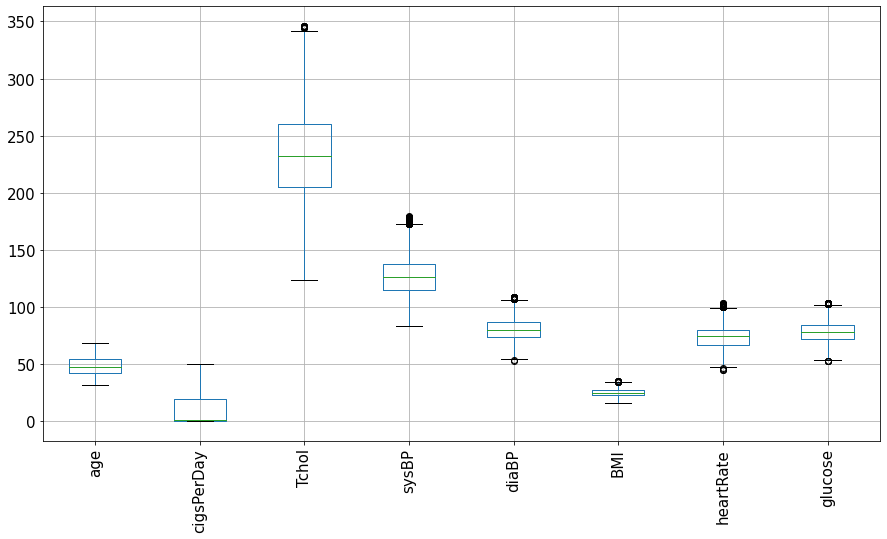

In [ ]:
boxplot = df.boxplot(column=['age','cigsPerDay','Tchol','sysBP','diaBP','BMI','heartRate','glucose'],figsize=(15,8),fontsize=15.0)
plt.xticks(rotation=90)

In [ ]:
df.shape


(3489, 16)

In [ ]:
X = df.iloc[:,0:14]  
Y = df.iloc[:,-1] 


            Specs       Score
4      cigsPerDay  247.749107
1             age  214.167402
10          sysBP  196.436759
9           Tchol   93.101163
7    prevalentHyp   43.800344
11          diaBP   31.446075
0          Gender   21.667971
12            BMI    5.732564
2       education    3.930536
3   currentSmoker    1.985226
13      heartRate    0.025236


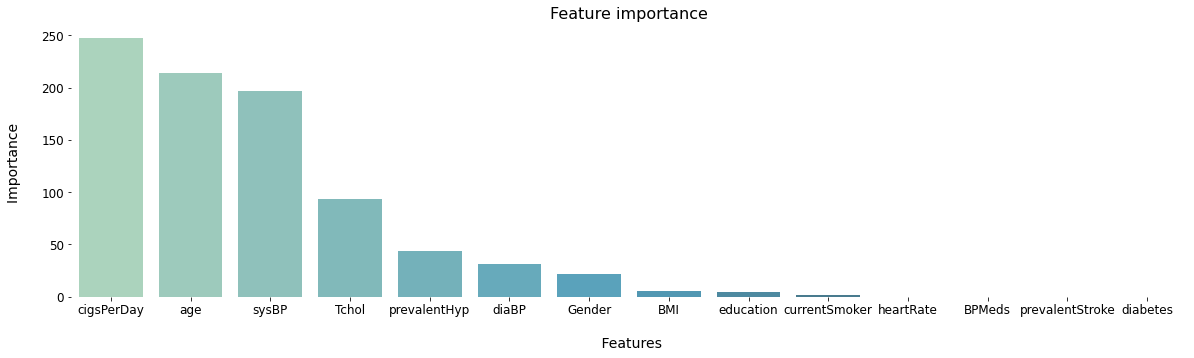

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
# X = df.iloc[:,0:14]  #independent columns
# y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

# sorting the features

featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

# lets visualize the feature selection plot 

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
X

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Tchol,sysBP,diaBP,BMI,heartRate
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0


In [ ]:
#important features into the variable
Final_feature=['cigsPerDay','age','sysBP','Tchol','prevalentHyp','diaBP','Gender','BMI']

In [ ]:
X=X[Final_feature]
Y=Y

In [ ]:
#Since we are using multiple models which are dealing with distance, so let's feature scale(Scaling) the data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
X = pd.DataFrame(scaler.fit_transform(X), columns=Final_feature)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


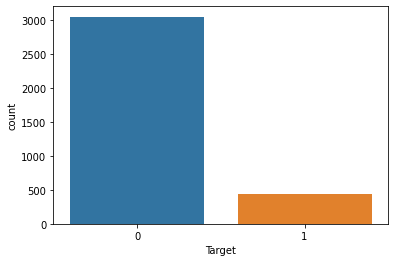

In [ ]:
# Ploting the Class imbalance.
df['Target'].value_counts(normalize=True)
sns.countplot(df['Target'])
plt.show()

In [ ]:
# Spliting the data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2337, 8)
(1152, 8)
(2337,)
(1152,)


In [ ]:
# SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)


X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


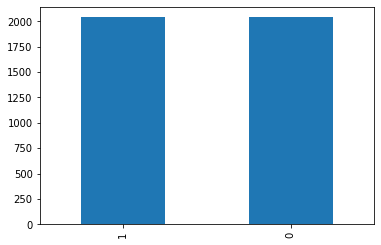

In [ ]:
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
# Importing the model.


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(solver = 'liblinear')

In [ ]:
# fit the model
clf.fit(X_train_new, y_train_new)


# prediction for Training data
train_pred_sm = clf.predict(X_train_new)


# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.6745953898970083
Accuracy score for Testing Dataset =  0.6545138888888888


Accuracy Score : 0.6545138888888888
Precision Score : 0.22
Recall Score : 0.678082191780822
F1 Score : 0.33221476510067116


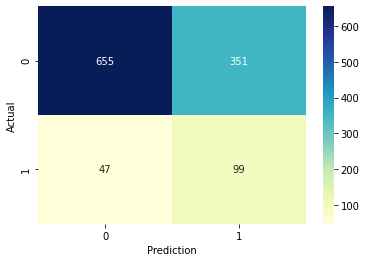

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,test_pred_sm)))
print('Precision Score : ' + str(precision_score(y_test,test_pred_sm)))
print('Recall Score : ' + str(recall_score(y_test,test_pred_sm)))
print('F1 Score : ' + str(f1_score(y_test,test_pred_sm)))


CONF = confusion_matrix(y_test.ravel(), test_pred_sm)
sns.heatmap(CONF,annot=True,cmap="YlGnBu",fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual")


plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve( y_test,test_pred_sm)
roc_auc = auc(fpr, tpr)

No handles with labels found to put in legend.


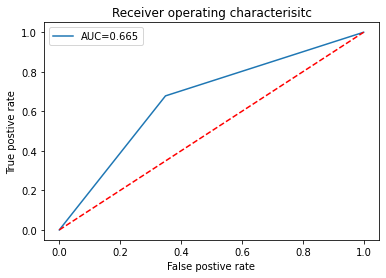

In [ ]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title("Receiver operating characterisitc")
plt.legend(loc="lower right")
plt.legend(["AUC=%.3f"%roc_auc])
plt.savefig("Log_ROC")
plt.show()

In [ ]:
# Importing the model.


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(max_depth=3, random_state=2)


In [ ]:
# fit the model
clf.fit(X_train_new, y_train_new)


# prediction for Training data
train_pred_sm = clf.predict(X_train_new)


# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.7005885237861696
Accuracy score for Testing Dataset =  0.6484375


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,test_pred_sm)))
print('Precision Score : ' + str(precision_score(y_test,test_pred_sm)))
print('Recall Score : ' + str(recall_score(y_test,test_pred_sm)))
print('F1 Score : ' + str(f1_score(y_test,test_pred_sm)))


Accuracy Score : 0.6484375
Precision Score : 0.20634920634920634
Recall Score : 0.6232876712328768
F1 Score : 0.31005110732538327


ROC AUC: 0.637688


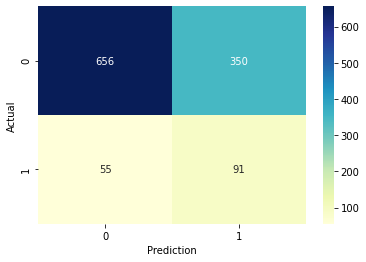

In [ ]:
CONF = confusion_matrix(y_test.ravel(), test_pred_sm)
sns.heatmap(CONF,annot=True,cmap="YlGnBu",fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual")

auc = roc_auc_score(y_test.ravel(), test_pred_sm)
print('ROC AUC: %f' % auc)


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve( y_test,test_pred_sm)
roc_auc = auc(fpr, tpr)


No handles with labels found to put in legend.


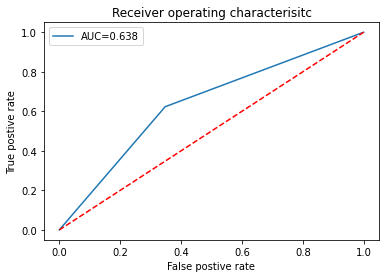

In [ ]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title("Receiver operating characterisitc")
plt.legend(loc="lower right")
plt.legend(["AUC=%.3f"%roc_auc])
plt.savefig("Log_ROC")
plt.show()

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 KNN=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# fit the model
KNN.fit(X_train_new, y_train_new)


# prediction for Training data
train_pred_sm = KNN.predict(X_train_new)


# prediction for Testing data
test_pred_sm = KNN.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.8820500245218245
Accuracy score for Testing Dataset =  0.6605902777777778


In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,test_pred_sm)))
print('Precision Score : ' + str(precision_score(y_test,test_pred_sm)))
print('Recall Score : ' + str(recall_score(y_test,test_pred_sm)))
print('F1 Score : ' + str(f1_score(y_test,test_pred_sm)))


Accuracy Score : 0.6605902777777778
Precision Score : 0.189873417721519
Recall Score : 0.5136986301369864
F1 Score : 0.27726432532347506


ROC AUC: 0.597804


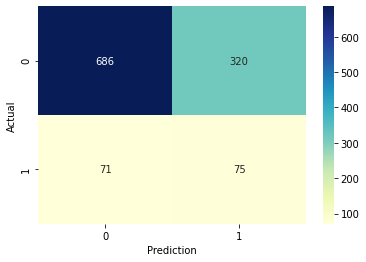

In [ ]:
CONF = confusion_matrix(y_test.ravel(), test_pred_sm)
sns.heatmap(CONF,annot=True,cmap="YlGnBu",fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual")

auc = roc_auc_score(y_test.ravel(), test_pred_sm)
print('ROC AUC: %f' % auc)


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve( y_test,test_pred_sm)
roc_auc = auc(fpr, tpr)


No handles with labels found to put in legend.


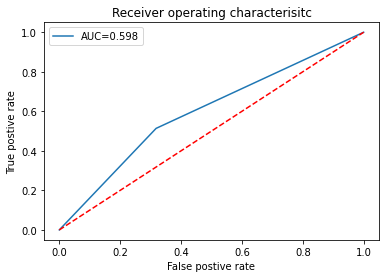

In [ ]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title("Receiver operating characterisitc")
plt.legend(loc="lower right")
plt.legend(["AUC=%.3f"%roc_auc])
plt.savefig("Log_ROC")
plt.show()